# Calling important libraries

In [3]:
from roucy_dumpfileparser import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import log_parser
import seaborn as sns
from matplotlib import animation
import time
import itertools
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

# Variable name set

In [4]:
name='seed1'
upper_half='upper_half_seed1.lammpstrj'
logfile='log_seed1_700.Pt_shape'


# finding the top layer height on each timestep
### This is important for understanding how the dislocation taking place

In [5]:
timestep=0
pt=0
dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
runtime  = 10000000 # corresponds to the run time used to make the dumpfile
account=[]
ave_top_300=[]
while timestep <= runtime:

    data, pt = parsedumpfile(upper_half, pt)
    z_axis=data['z']
    z_axis.sort()
    heighest=z_axis[-20:]
    mean=sum(heighest)/len(heighest)
    ave_top_300.append(mean)
    timestep += dumpfreq # update timestep 

# Calculating the displacement on each time step

In [6]:
thermo_coated_300K=log_parser.thermo_dict(logfile,1)
minimum_300K=thermo_coated_300K['c_2[3]']
lowest_300K=float(min(minimum_300K))
print(lowest_300K, 'lowest position')
initial_300=float(ave_top_300[0])
print(initial_300, 'average position of top layer')
original_length=initial_300-lowest_300K
print(original_length,'originial length')

displacement_300k=[]
for x in ave_top_300:
    new_length=float(x)-lowest_300K
    disp=(original_length-new_length)/original_length

    displacement_300k.append(disp)


-17.696825 lowest position
17.557565 average position of top layer
35.25439 originial length


# importing the force information

In [7]:
force_coated_300K=thermo_coated_300K['f_printforce']
converted_force_coated_300K=[x*1.602 for x in force_coated_300K]

# plotting force against displacement

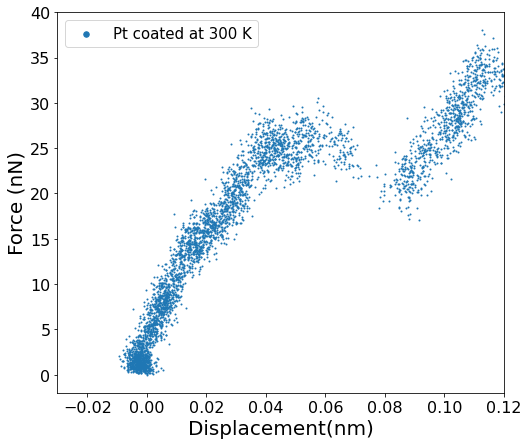

In [17]:
plt.figure(figsize=(8,7))
plt.scatter(displacement_300k,converted_force_coated_300K,label='Pt coated at 300 K',s=1)

plt.xlabel('Displacement(nm)',fontsize=20)
plt.ylabel("Force (nN)",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-2,40])
plt.xlim(-.03,.12)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]


# Function for Animation

In [13]:
from matplotlib import animation

def update_points(num):
    '''
    更新数据点
    '''
    point_ani.set_data(x[num], y[num])
    return point_ani,

In [14]:
animated_strain=displacement_300k
animated_y=converted_force_coated_300K

x=animated_strain
y=animated_y

MovieWriter imagemagick unavailable; using Pillow instead.


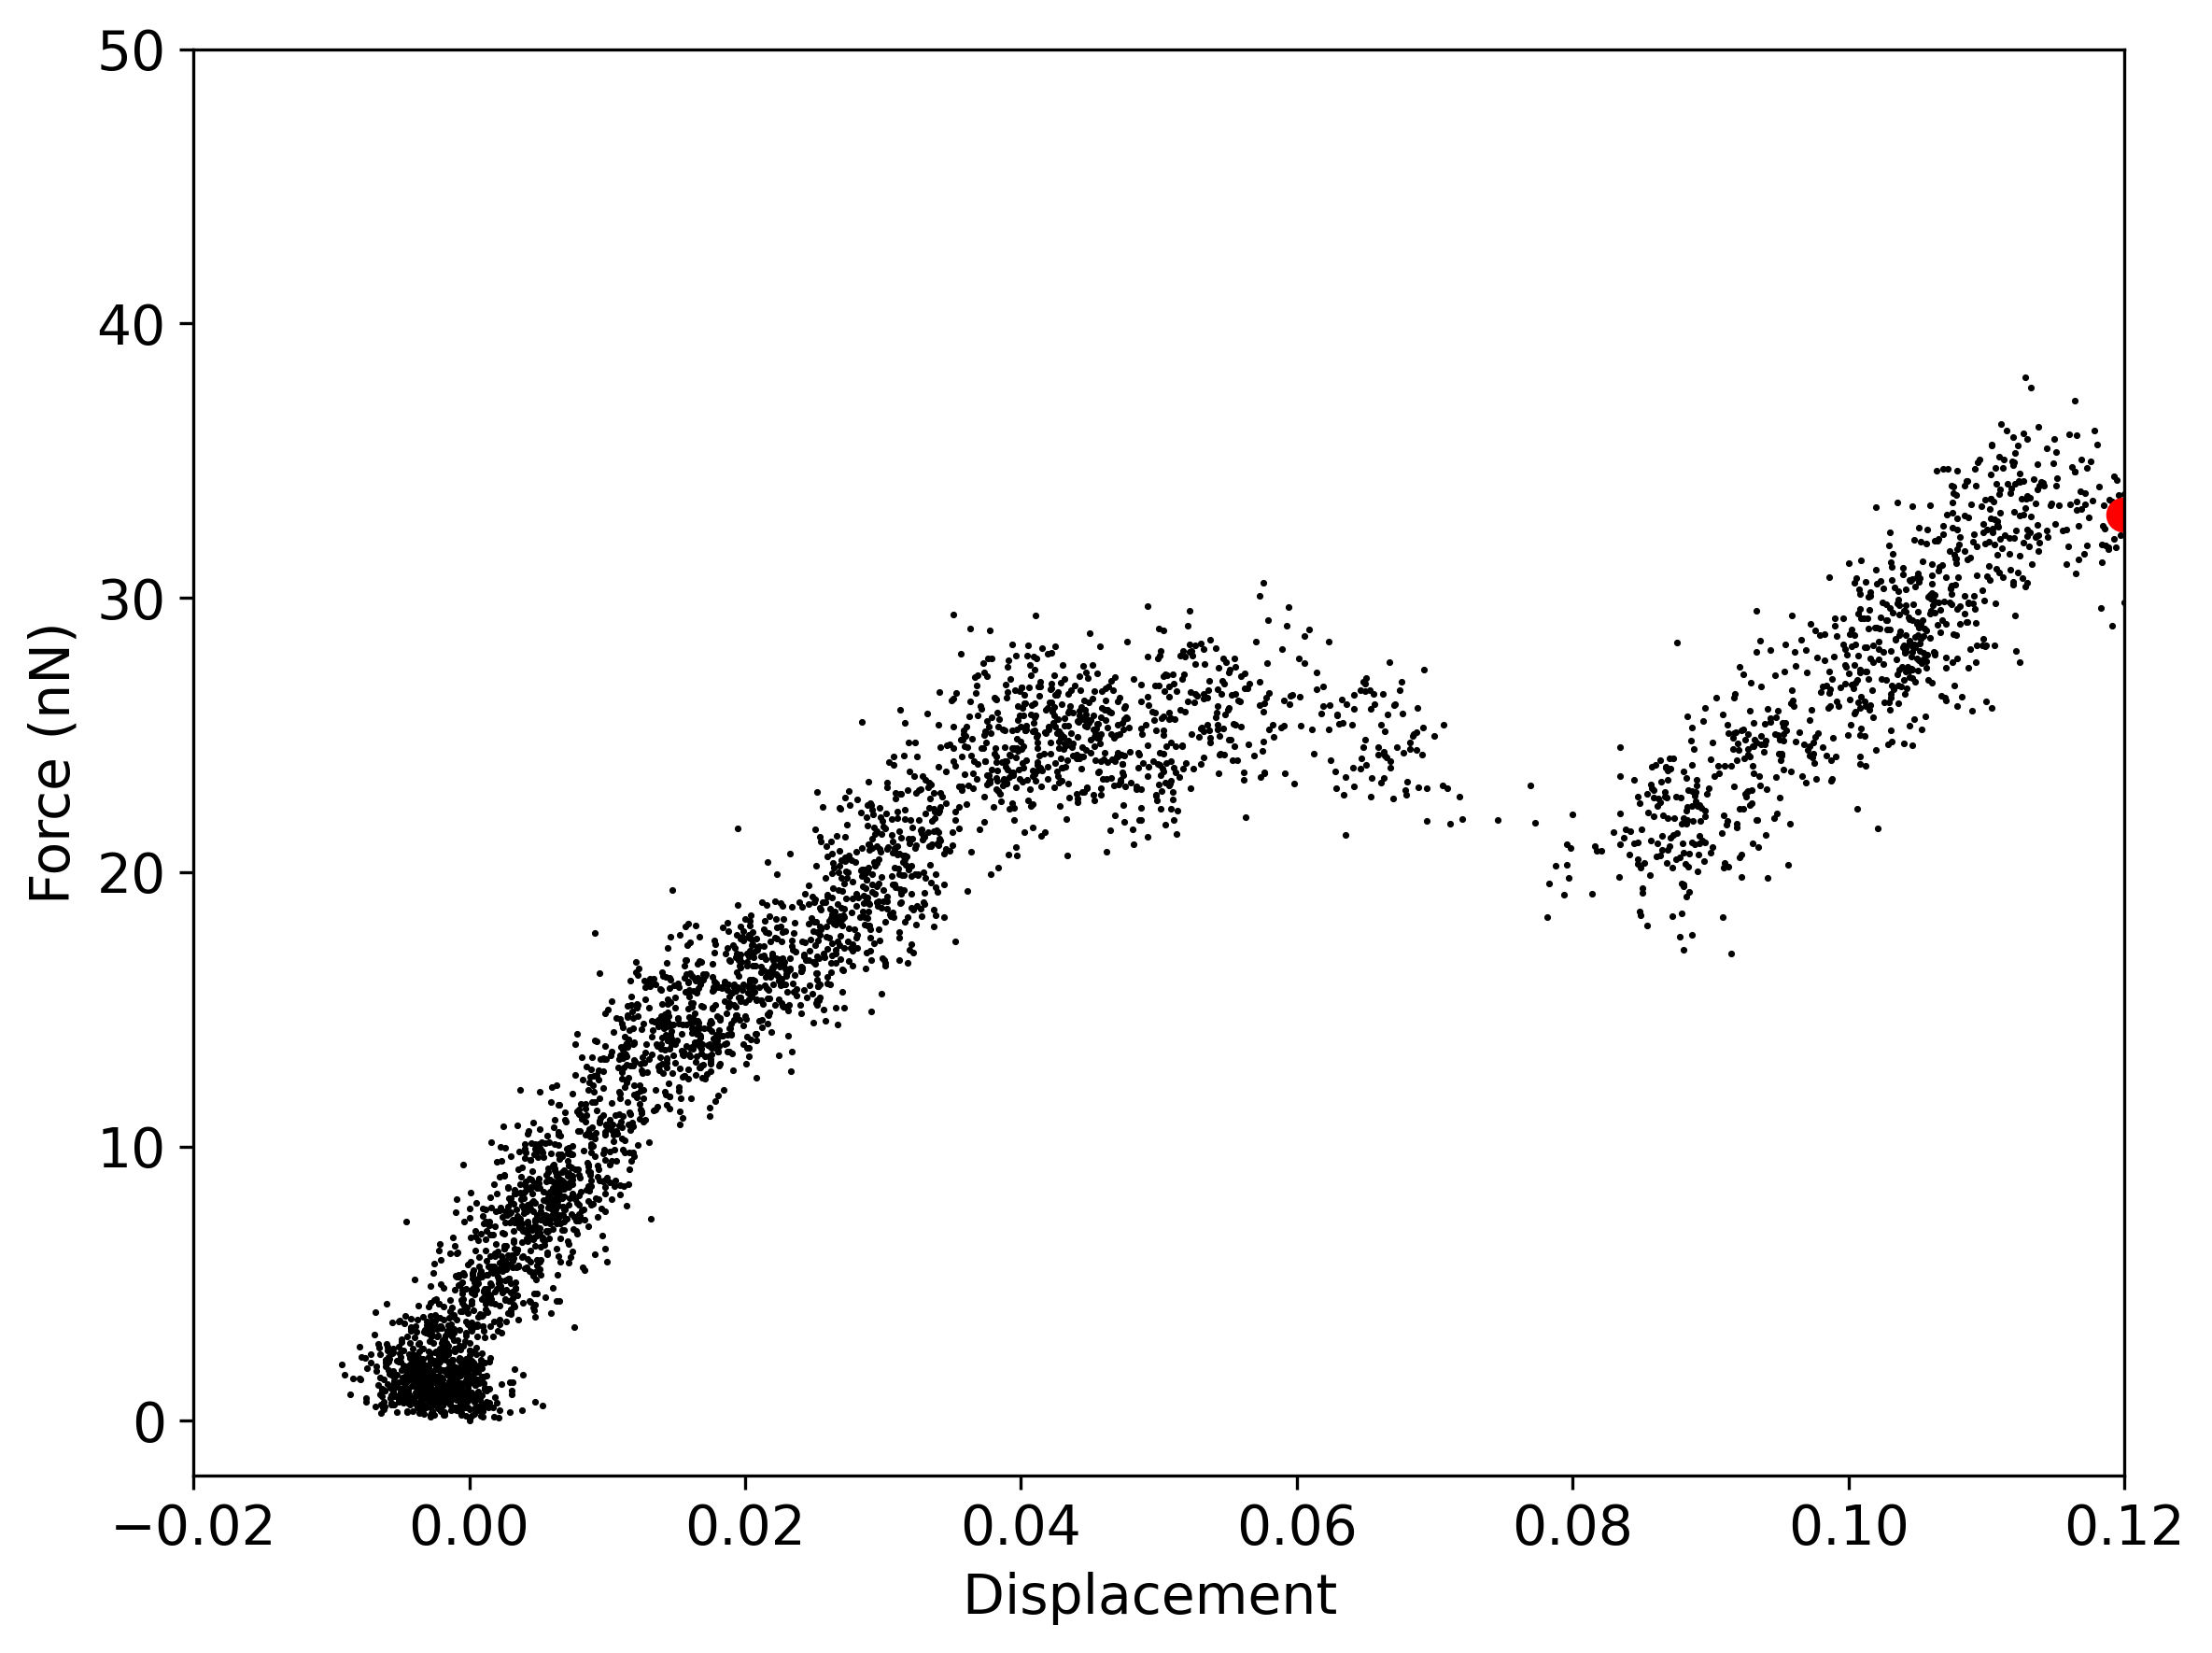

In [16]:
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True,dpi=300)
plt.scatter(x,y,lw=.3,color='k',s=2)
point_ani, = plt.plot(x[0], y[0], "ro",markersize=8)
ax.set_ylabel("Force (nN)",size=14)
ax.set_xlabel("Displacement ",size=14)
ax.set_ylim([-2,50])
ax.set_xlim([-.02,0.12])
plt.setp(ax.yaxis.get_majorticklabels(),size = 14)
plt.setp(ax.xaxis.get_majorticklabels(),size = 14)
ani = animation.FuncAnimation(fig, update_points, np.arange(1, len(x), 18), interval=1, blit=True)
ani.save('{}.gif'.format(name), writer='imagemagick', fps=4)